# AND GATE

In [131]:
import numpy as np
import matplotlib.pyplot as plt

Vamos a hacer una red con la siguiente estructura

![waterfall](image.png)

In [132]:
def ReLU(x):
    return np.maximum(0, x)

# Derivada de la función ReLU para arrays de numpy
def deriv_ReLU(x):
    return np.where(x >= 0, 1, 0)

def MSE(y, a_2):
    return 0.5 * np.sum((a_2 - y)**2)

In [133]:
x = np.array([[1,1],[1,0],[0,1],[0,0]]).T
y = np.array([[1],[0],[0],[0]]).T
print(x)
print(y)

[[1 1 0 0]
 [1 0 1 0]]
[[1 0 0 0]]


In [134]:
W1 = np.random.randn(3, 2)
W2 = np.random.randn(1, 3)
b1 = np.random.randn(3,)
b2 = np.random.randn(1,)


![waterfall](backpropagation.png)

In [135]:
learning_rate = 0.01
Costs = []
iterations = [i for i in range(10000)]
for i in iterations:
    # forward propagation
    Z1 = np.dot(W1, x)
    A1 = ReLU(Z1)
    Z2 = np.dot(W2, A1)
    A2 = Z2
    Costs.append(MSE(y, A2))
    # Backpropagation
    delta2 = -(y - A2)
    delta1 = np.dot(W2.T, delta2) * deriv_ReLU(Z1)
    W2 -= learning_rate * np.dot(delta2, A1.T)
    b2 -= learning_rate * np.sum(delta2)
    W1 -= learning_rate * np.dot(delta1, x.T)
    b1 -= learning_rate * np.sum(delta1)
print(Costs[i])

1.1790437349149597e-28


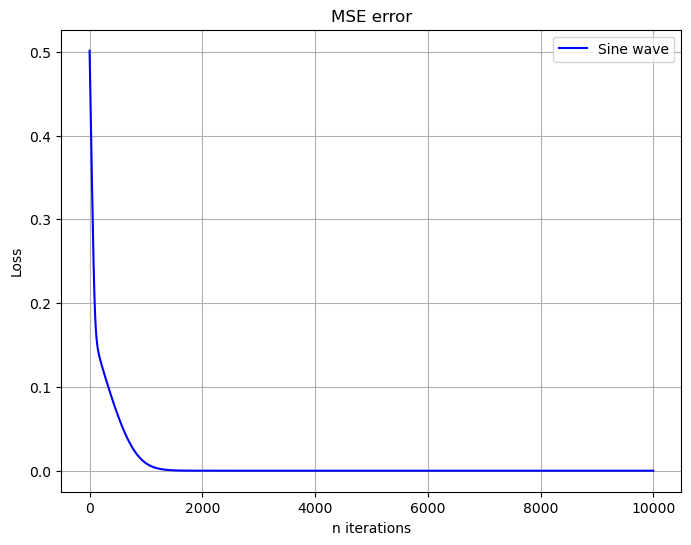

In [136]:
plt.figure(figsize=(8, 6))
plt.plot(iterations, Costs, label='Sine wave', color='blue')
plt.title('MSE error')
plt.xlabel('n iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

In [137]:
print(A2)
print(y)

[[1.00000000e+00 1.05360565e-14 4.99600361e-15 0.00000000e+00]]
[[1 0 0 0]]
